In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
topic=['IT과학','경제','사회','생활문화','세계','스포츠','정치']

In [3]:
df=pd.read_csv('./Data/train_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45654 entries, 0 to 45653
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      45654 non-null  int64 
 1   title      45654 non-null  object
 2   topic_idx  45654 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


In [4]:
df.duplicated().sum()

0

In [5]:
df=df.iloc[:,1:]
df.head()

,title,topic_idx
0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4


In [6]:
df['topic_idx'].value_counts()

4    7629
2    7362
5    6933
6    6751
1    6222
3    5933
0    4824
Name: topic_idx, dtype: int64

In [7]:
title_list=np.array(df['title'])

In [8]:
y_train=np.array(df['topic_idx'])
y_train

array([4, 4, 4, ..., 1, 2, 2], dtype=int64)

In [9]:
# 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(title_list, y_train,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y_train)

In [29]:
x_train.shape, x_test.shape

((36523,), (9131,))

In [10]:
from konlpy.tag import Okt

In [11]:
okt=Okt()

In [12]:
okt.morphs(x_train[1])

['이원종',
 '2',
 '野',
 '지',
 '도부',
 '면담',
 '…',
 '화두',
 '는',
 '협치',
 '칭찬',
 '도',
 '해달라',
 '종합']

In [13]:
x_train[1].replace('…', ' ')

'이원종 2野 지도부 면담 화두는 협치 칭찬도 해달라종합'

In [14]:
# 단어별로 나누기
sentences=[]
for sent in x_train:
    sent=sent.replace('…', ' ')
    token=okt.morphs(sent)
    sentences.append(token)

In [15]:
# 불용어 제거
# from konlpy.corpus import stopwords
# stopwords.words()
stopwords=["은","는","이","가","!","\"","$","%","&","'","(",")","*","+",",","-",".","...","…","0","1","2","3","4","5","6","7","8","9",";","<","=",">","?","@","\\","^","_","`","|","~","·","—","——","‘","’","“","”","…","、","。","〈","〉","《","》","가","가까스로","가령","각","각각","각자","각종","갖고말하자면","같다","같이","개의치않고","거니와","거바","거의","것","것과 같이","것들","게다가","게우다","겨우","견지에서","결과에 이르다","결국","결론을 낼 수 있다","겸사겸사","고려하면","고로","곧","공동으로","과","과연","관계가 있다","관계없이","관련이 있다","관하여","관한","관해서는","구","구체적으로","구토하다","그","그들","그때","그래","그래도","그래서","그러나","그러니","그러니까","그러면","그러므로","그러한즉","그런 까닭에","그런데","그런즉","그럼","그럼에도 불구하고","그렇게 함으로써","그렇지","그렇지 않다면","그렇지 않으면","그렇지만","그렇지않으면","그리고","그리하여","그만이다","그에 따르는","그위에","그저","그중에서","그치지 않다","근거로","근거하여","기대여","기점으로","기준으로","기타","까닭으로","까악","까지","까지 미치다","까지도","꽈당","끙끙","끼익","나","나머지는","남들","남짓","너","너희","너희들","네","넷","년","논하지 않다","놀라다","누가 알겠는가","누구","다른","다른 방면으로","다만","다섯","다소","다수","다시 말하자면","다시말하면","다음","다음에","다음으로","단지","답다","당신","당장","대로 하다","대하면","대하여","대해 말하자면","대해서","댕그","더구나","더군다나","더라도","더불어","더욱더","더욱이는","도달하다","도착하다","동시에","동안","된바에야","된이상","두번째로","둘","둥둥","뒤따라","뒤이어","든간에","들","등","등등","딩동","따라","따라서","따위","따지지 않다","딱","때","때가 되어","때문에","또","또한","뚝뚝","라 해도","령","로","로 인하여","로부터","로써","륙","를","마음대로","마저","마저도","마치","막론하고","만 못하다","만약","만약에","만은 아니다","만이 아니다","만일","만큼","말하자면","말할것도 없고","매","매번","메쓰겁다","몇","모","모두","무렵","무릎쓰고","무슨","무엇","무엇때문에","물론","및","바꾸어말하면","바꾸어말하자면","바꾸어서 말하면","바꾸어서 한다면","바꿔 말하면","바로","바와같이","밖에 안된다","반대로","반대로 말하자면","반드시","버금","보는데서","보다더","보드득","본대로","봐","봐라","부류의 사람들","부터","불구하고","불문하고","붕붕","비걱거리다","비교적","비길수 없다","비로소","비록","비슷하다","비추어 보아","비하면","뿐만 아니라","뿐만아니라","뿐이다","삐걱","삐걱거리다","사","삼","상대적으로 말하자면","생각한대로","설령","설마","설사","셋","소생","소인","솨","쉿","습니까","습니다","시각","시간","시작하여","시초에","시키다","실로","심지어","아","아니","아니나다를가","아니라면","아니면","아니었다면","아래윗","아무거나","아무도","아야","아울러","아이","아이고","아이구","아이야","아이쿠","아하","아홉","안 그러면","않기 위하여","않기 위해서","알 수 있다","알았어","앗","앞에서","앞의것","야","약간","양자","어","어기여차","어느","어느 년도","어느것","어느곳","어느때","어느쪽","어느해","어디","어때","어떠한","어떤","어떤것","어떤것들","어떻게","어떻해","어이","어째서","어쨋든","어쩔수 없다","어찌","어찌됏든","어찌됏어","어찌하든지","어찌하여","언제","언젠가","얼마","얼마 안 되는 것","얼마간","얼마나","얼마든지","얼마만큼","얼마큼","엉엉","에","에 가서","에 달려 있다","에 대해","에 있다","에 한하다","에게","에서","여","여기","여덟","여러분","여보시오","여부","여섯","여전히","여차","연관되다","연이서","영","영차","옆사람","예","예를 들면","예를 들자면","예컨대","예하면","오","오로지","오르다","오자마자","오직","오호","오히려","와","와 같은 사람들","와르르","와아","왜","왜냐하면","외에도","요만큼","요만한 것","요만한걸","요컨대","우르르","우리","우리들","우선","우에 종합한것과같이","운운","월","위에서 서술한바와같이","위하여","위해서","윙윙","육","으로","으로 인하여","으로서","으로써","을","응","응당","의","의거하여","의지하여","의해","의해되다","의해서","이","이 되다","이 때문에","이 밖에","이 외에","이 정도의","이것","이곳","이때","이라면","이래","이러이러하다","이러한","이런","이럴정도로","이렇게 많은 것","이렇게되면","이렇게말하자면","이렇구나","이로 인하여","이르기까지","이리하여","이만큼","이번","이봐","이상","이어서","이었다","이와 같다","이와 같은","이와 반대로","이와같다면","이외에도","이용하여","이유만으로","이젠","이지만","이쪽","이천구","이천육","이천칠","이천팔","인 듯하다","인젠","일","일것이다","일곱","일단","일때","일반적으로","일지라도","임에 틀림없다","입각하여","입장에서","잇따라","있다","자","자기","자기집","자마자","자신","잠깐","잠시","저","저것","저것만큼","저기","저쪽","저희","전부","전자","전후","점에서 보아","정도에 이르다","제","제각기","제외하고","조금","조차","조차도","졸졸","좀","좋아","좍좍","주룩주룩","주저하지 않고","줄은 몰랏다","줄은모른다","중에서","중의하나","즈음하여","즉","즉시","지든지","지만","지말고","진짜로","쪽으로","차라리","참","참나","첫번째로","쳇","총적으로","총적으로 말하면","총적으로 보면","칠","콸콸","쾅쾅","쿵","타다","타인","탕탕","토하다","통하여","툭","퉤","틈타","팍","팔","퍽","펄렁","하","하게될것이다","하게하다","하겠는가","하고 있다","하고있었다","하곤하였다","하구나","하기 때문에","하기 위하여","하기는한데","하기만 하면","하기보다는","하기에","하나","하느니","하는 김에","하는 편이 낫다","하는것도","하는것만 못하다","하는것이 낫다","하는바","하더라도","하도다","하도록시키다","하도록하다","하든지","하려고하다","하마터면","하면 할수록","하면된다","하면서","하물며","하여금","하여야","하자마자","하지 않는다면","하지 않도록","하지마","하지마라","하지만","하하","한 까닭에","한 이유는","한 후","한다면","한다면 몰라도","한데","한마디","한적이있다","한켠으로는","한항목","할 따름이다","할 생각이다","할 줄 안다","할 지경이다","할 힘이 있다","할때","할만하다","할망정","할뿐","할수있다","할수있어","할줄알다","할지라도","할지언정","함께","해도된다","해도좋다","해봐요","해서는 안된다","해야한다","해요","했어요","향하다","향하여","향해서","허","허걱","허허","헉","헉헉","헐떡헐떡","형식으로 쓰여","혹시","혹은","혼자","훨씬","휘익","휴","흐흐","흥","힘입어","︿","！","＃","＄","％","＆","（","）","＊","＋","，","０","１","２","３","４","５","６","７","８","９","：","；","＜","＞","？","＠","［","］","｛","｜","｝","～","￥"]

In [16]:
sentences2=[]

for words in sentences:
    sent=[]
    for word in words:
        if word not in stopwords:
            sent.append(word)
    sentences2.append(sent)

In [49]:
type(sentences2)

list

In [17]:
len(sentences2), sentences2[0]

(36523, ['인천', '공립', '유치원', '교사', '87%', '근무', '중', '질병', '얻어'])

In [18]:
len(sentences), sentences2[1]

(36523, ['이원종', '野', '지', '도부', '면담', '화두', '협치', '칭찬', '도', '해달라', '종합'])

In [19]:
from keras.preprocessing.text import text_to_word_sequence, Tokenizer

In [20]:
tokenizer=Tokenizer(oov_token=1, num_words=1335) # , num_words=
tokenizer.fit_on_texts(sentences2)

In [21]:
len(tokenizer.word_index)

32457

In [22]:
tokenizer.word_index

{1: 1,
 '종합': 2,
 '서': 3,
 '한': 4,
 '명': 5,
 '도': 6,
 '대통령': 7,
 '美': 8,
 '한국': 9,
 '대': 10,
 '北': 11,
 '전': 12,
 '위': 13,
 '하는': 14,
 '기': 15,
 '첫': 16,
 '삼성': 17,
 '적': 18,
 '이란': 19,
 '보': 20,
 '중': 21,
 '당': 22,
 '만에': 23,
 '감독': 24,
 '장': 25,
 '경기': 26,
 '출시': 27,
 '中': 28,
 '주': 29,
 'lg': 30,
 'g': 31,
 '게시판': 32,
 '트럼프': 33,
 '신간': 34,
 'kt': 35,
 '안': 36,
 '문': 37,
 '개': 38,
 '朴': 39,
 '투자': 40,
 '개발': 41,
 '정부': 42,
 '지원': 43,
 '서울': 44,
 '지': 45,
 'sk': 46,
 '고': 47,
 '더': 48,
 '할': 49,
 '해': 50,
 '중국': 51,
 '해야': 52,
 '내': 53,
 '올해': 54,
 '10': 55,
 '화': 56,
 '최고': 57,
 '민주': 58,
 '원': 59,
 '차': 60,
 '영업': 61,
 '간': 62,
 '기업': 63,
 '미국': 64,
 '개최': 65,
 '현대': 66,
 '회': 67,
 '공개': 68,
 '세계': 69,
 '비': 70,
 '새': 71,
 '기술': 72,
 '연': 73,
 '日': 74,
 '최': 75,
 '작년': 76,
 '신': 77,
 '코로나': 78,
 '김정은': 79,
 '대표': 80,
 '최대': 81,
 '게임': 82,
 '성': 83,
 '다': 84,
 '증권': 85,
 '시장': 86,
 '수': 87,
 '금융': 88,
 '사망': 89,
 '상': 90,
 '19': 91,
 '총리': 92,
 '북한': 93,
 '시': 94,
 's': 95,
 '권': 96

In [23]:
sorted(tokenizer.word_counts.items(), key=lambda x: x[1], reverse=True)[1334]

('여파', 50)

In [24]:
# tokenizer.word_counts

In [228]:
for i in range(1200,1400):
    print(f'{i}: {sorted(tokenizer.word_counts.values(), reverse=True)[i]}')
    
# idx 596 이하 빈도수 100이상/ 787:80 / 1334:50

1200: 55
1201: 55
1202: 55
1203: 55
1204: 55
1205: 55
1206: 55
1207: 55
1208: 55
1209: 55
1210: 55
1211: 54
1212: 54
1213: 54
1214: 54
1215: 54
1216: 54
1217: 54
1218: 54
1219: 54
1220: 54
1221: 54
1222: 54
1223: 54
1224: 54
1225: 54
1226: 54
1227: 54
1228: 54
1229: 54
1230: 54
1231: 54
1232: 54
1233: 54
1234: 53
1235: 53
1236: 53
1237: 53
1238: 53
1239: 53
1240: 53
1241: 53
1242: 53
1243: 53
1244: 53
1245: 53
1246: 53
1247: 53
1248: 53
1249: 53
1250: 53
1251: 53
1252: 53
1253: 53
1254: 53
1255: 53
1256: 53
1257: 53
1258: 53
1259: 53
1260: 52
1261: 52
1262: 52
1263: 52
1264: 52
1265: 52
1266: 52
1267: 52
1268: 52
1269: 52
1270: 52
1271: 52
1272: 52
1273: 52
1274: 52
1275: 52
1276: 52
1277: 52
1278: 52
1279: 52
1280: 52
1281: 52
1282: 51
1283: 51
1284: 51
1285: 51
1286: 51
1287: 51
1288: 51
1289: 51
1290: 51
1291: 51
1292: 51
1293: 51
1294: 51
1295: 51
1296: 51
1297: 51
1298: 51
1299: 51
1300: 51
1301: 51
1302: 51
1303: 51
1304: 51
1305: 51
1306: 51
1307: 50
1308: 50
1309: 50
1310: 50
1

In [234]:
sorted(tokenizer.word_counts.values(), reverse=True)[646]

94

In [235]:
# import matplotlib.pyplot as plt
# plt.hist(sorted(tokenizer.word_counts.values(), reverse=True))
# plt.show()

In [236]:
sent_len=[len(x) for x in sentences2]
sent_len=np.array(sent_len)
sent_len.max(), sent_len.min(), sent_len.mean()

(18, 1, 9.328094625304603)

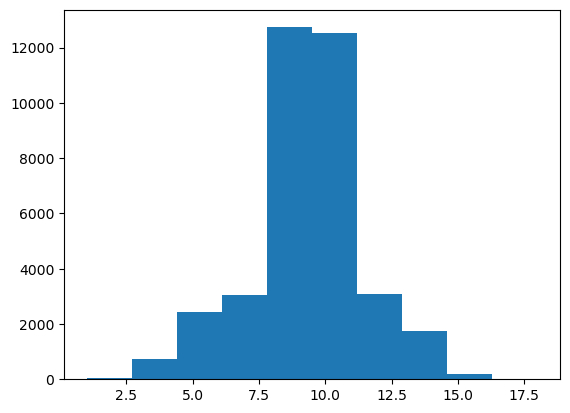

In [237]:
import matplotlib.pyplot as plt
plt.hist(sent_len)
plt.show()

In [25]:
# 문장을 생성된 사전(vaca)을 기반으로 수치화
seq_voca=tokenizer.texts_to_sequences(sentences2)

In [26]:
seq_voca[2], sentences2[2], x_train[2]

([343, 57, 1, 1, 1, 111, 1, 1, 1],
 ['구글', '최고', '연구자', '사고력', '지닌', 'AI', '먼', '훗날', '얘기'],
 '구글 최고연구자 사고력 지닌 AI는 먼 훗날 얘기')

In [27]:
from keras.utils import pad_sequences

In [241]:
seq_voca[0]

[365, 1, 1, 852, 1, 1, 21, 1, 1]

In [28]:
encoding=pad_sequences(seq_voca)

In [29]:
len(encoding[0])

18

In [30]:
# 원 핫 인코딩
from keras.utils import to_categorical

In [31]:
ohe=to_categorical(encoding)

In [32]:
ohe.shape

(36523, 18, 1335)

In [33]:
y_train_ohe=to_categorical(y_train)

In [34]:
y_train_ohe.shape

(36523, 7)

In [35]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout, LSTM

In [ ]:
model=Sequential()
                                                # return_sequences=True 그대로 돌려줌(RNN층 여러개 사용할 때)
model.add(SimpleRNN(128, input_shape=(18, 1335), return_sequences=True))
model.add(Dropout(0.3))
model.add(SimpleRNN(64, return_sequences=True))
model.add(Dropout(0.3))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(16, return_sequences=True))
model.add(SimpleRNN(8))
model.add(Dense(7, activation='softmax'))
model.summary()

In [276]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')


In [ ]:
model.fit(ohe, y_train_ohe, batch_size=128, epochs=10, validation_split=0.2)


In [36]:
# lstm 
model2=Sequential()
model2.add(LSTM(64, activation='relu', input_shape=(18, 1335), return_sequences=True))
model2.add(Dropout(0.3))
model2.add(LSTM(32, activation='relu', return_sequences=True))
model2.add(LSTM(16, activation='relu', return_sequences=True))
model2.add(LSTM(8, activation='relu'))

model2.add(Dense(7, activation='softmax'))
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 18, 64)            358400    
                                                                 
 dropout (Dropout)           (None, 18, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 18, 32)            12416     
                                                                 
 lstm_2 (LSTM)               (None, 18, 16)            3136      
                                                                 
 lstm_3 (LSTM)               (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 7)                 63        
                                                                 
Total params: 374,815
Trainable params: 374,815
Non-trai

In [37]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [46]:
# 모델 체크포인트 생성
from keras.callbacks import ModelCheckpoint

path='./{epoch:02d}-{val_accuracy:.4f}.hdf5'
model_ckpt = ModelCheckpoint(path, save_best_only=True, monitor='val_accuracy')

In [47]:
model2.fit(ohe, y_train_ohe, batch_size=128, epochs=2, validation_split=0.2, callbacks=[model_ckpt])

Epoch 1/2
229/229 [==============================] - 17s 74ms/step - loss: 0.3966 - accuracy: 0.8649 - val_loss: 0.4086 - val_accuracy: 0.8615
Epoch 2/2
229/229 [==============================] - 18s 79ms/step - loss: 0.3443 - accuracy: 0.8812 - val_loss: 0.4111 - val_accuracy: 0.8561


In [ ]:
# 한글자 제거
sentences3=[]

for words in sentences2:
    sent=[]
    for word in words:
        if len(word) > 1:
            sent.append(word)
    sentences3.append(sent)

In [ ]:
sentences3[0]

In [265]:
tokenizer3=Tokenizer(oov_token=1, num_words=1335) # , num_words=
tokenizer3.fit_on_texts(sentences3)
seq_voca3=tokenizer.texts_to_sequences(sentences3)
encoding3=pad_sequences(seq_voca3)
ohe3=to_categorical(encoding3)

In [273]:
model3=Sequential()
# rtsm
                                            
model3.add(SimpleRNN(128, input_shape=(14, 1335), return_sequences=True))
model3.add(Dropout(0.3))
model3.add(SimpleRNN(64, return_sequences=True))
model3.add(Dropout(0.3))
model3.add(SimpleRNN(32, return_sequences=True))
model3.add(SimpleRNN(16, return_sequences=True))
model3.add(SimpleRNN(8))
model3.add(Dense(7, activation='softmax'))
model3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_43 (SimpleRNN)   (None, 14, 128)           187392    
                                                                 
 dropout_4 (Dropout)         (None, 14, 128)           0         
                                                                 
 simple_rnn_44 (SimpleRNN)   (None, 14, 64)            12352     
                                                                 
 dropout_5 (Dropout)         (None, 14, 64)            0         
                                                                 
 simple_rnn_45 (SimpleRNN)   (None, 14, 32)            3104      
                                                                 
 simple_rnn_46 (SimpleRNN)   (None, 14, 16)            784       
                                                                 
 simple_rnn_47 (SimpleRNN)   (None, 8)               

In [274]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

Epoch 1/10
229/229 [==============================] - 16s 55ms/step - loss: 1.6685 - accuracy: 0.3441 - val_loss: 1.1981 - val_accuracy: 0.6052
Epoch 2/10
229/229 [==============================] - 12s 51ms/step - loss: 1.0652 - accuracy: 0.6583 - val_loss: 0.9605 - val_accuracy: 0.7025
Epoch 3/10
229/229 [==============================] - 12s 52ms/step - loss: 0.8903 - accuracy: 0.7216 - val_loss: 0.8778 - val_accuracy: 0.7168
Epoch 4/10
229/229 [==============================] - 11s 50ms/step - loss: 0.7982 - accuracy: 0.7483 - val_loss: 0.8401 - val_accuracy: 0.7299
Epoch 5/10
229/229 [==============================] - 13s 58ms/step - loss: 0.7273 - accuracy: 0.7725 - val_loss: 0.8737 - val_accuracy: 0.7151
Epoch 6/10
229/229 [==============================] - 16s 68ms/step - loss: 0.6823 - accuracy: 0.7829 - val_loss: 0.8364 - val_accuracy: 0.7322
Epoch 7/10
229/229 [==============================] - 14s 63ms/step - loss: 0.6358 - accuracy: 0.7988 - val_loss: 0.8595 - val_accuracy:

In [278]:
model3.fit(ohe3, y_train_ohe, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
229/229 [==============================] - 13s 55ms/step - loss: 0.5255 - accuracy: 0.8314 - val_loss: 0.9255 - val_accuracy: 0.7117
Epoch 2/10
229/229 [==============================] - 15s 64ms/step - loss: 0.5057 - accuracy: 0.8373 - val_loss: 0.9009 - val_accuracy: 0.7247
Epoch 3/10
229/229 [==============================] - 14s 61ms/step - loss: 0.4907 - accuracy: 0.8418 - val_loss: 0.9462 - val_accuracy: 0.7153
Epoch 4/10
229/229 [==============================] - 14s 60ms/step - loss: 0.4766 - accuracy: 0.8447 - val_loss: 0.9393 - val_accuracy: 0.7181
Epoch 5/10
229/229 [==============================] - 14s 62ms/step - loss: 0.4601 - accuracy: 0.8520 - val_loss: 0.9367 - val_accuracy: 0.7220
Epoch 6/10
229/229 [==============================] - 14s 60ms/step - loss: 0.4510 - accuracy: 0.8551 - val_loss: 0.9848 - val_accuracy: 0.7140
Epoch 7/10
229/229 [==============================] - 13s 57ms/step - loss: 0.4431 - accuracy: 0.8565 - val_loss: 0.9666 - val_accuracy:

In [40]:
# 교차검증
from sklearn.model_selection import StratifiedKFold

In [48]:
n_fold = 5  
seed = 42

cv = StratifiedKFold(n_splits = n_fold, shuffle=True, random_state=seed)

for i, (i_trn, i_val) in enumerate(cv.split(ohe, y_train), 1):
    print(f'training model for CV #{i}')

    model2.fit(ohe[i_trn], 
            to_categorical(y_train[i_trn]),
            validation_data=(ohe[i_val], to_categorical(y_train[i_val])),
            epochs=10,
            batch_size=512,
            callbacks=[model_ckpt])

training model for CV #1
Epoch 1/10
58/58 [==============================] - 12s 202ms/step - loss: 0.3164 - accuracy: 0.8945 - val_loss: 0.2750 - val_accuracy: 0.9050
Epoch 2/10
58/58 [==============================] - 12s 213ms/step - loss: 0.2873 - accuracy: 0.9021 - val_loss: 0.2760 - val_accuracy: 0.9058
Epoch 3/10
58/58 [==============================] - 15s 258ms/step - loss: 0.2747 - accuracy: 0.9059 - val_loss: 0.2689 - val_accuracy: 0.9058
Epoch 4/10
58/58 [==============================] - 15s 265ms/step - loss: 0.2612 - accuracy: 0.9119 - val_loss: 0.2733 - val_accuracy: 0.9040
Epoch 5/10
58/58 [==============================] - 13s 229ms/step - loss: 0.2556 - accuracy: 0.9133 - val_loss: 0.2855 - val_accuracy: 0.9024
Epoch 6/10
58/58 [==============================] - 14s 236ms/step - loss: 0.2490 - accuracy: 0.9164 - val_loss: 0.2937 - val_accuracy: 0.8986
Epoch 7/10
58/58 [==============================] - 13s 233ms/step - loss: 0.2432 - accuracy: 0.9174 - val_loss: 0.31

In [ ]:
load